# Weather - Time Series Forecasting

In [1]:
import numpy as np 
import pandas as pd 
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(3653, 5)

In [4]:
df.head()

,date,Temperature,Dew,Humidity,Pressure
0,01-01-2012,25.30,23.26,17.82,100.63
1,02-01-2012,25.49,22.97,17.52,100.64
2,03-01-2012,25.76,22.97,17.52,100.63
3,04-01-2012,25.57,23.01,17.58,100.67
4,05-01-2012,25.17,22.40,16.85,100.83


# Basic information about data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3653 non-null   object 
 1   Temperature  3653 non-null   float64
 2   Dew          3653 non-null   float64
 3   Humidity     3653 non-null   float64
 4   Pressure     3653 non-null   float64
dtypes: float64(4), object(1)
memory usage: 142.8+ KB


In [6]:
df.describe()

,Temperature,Dew,Humidity,Pressure
count,3653.000000,3653.000000,3653.000000,3653.000000
mean,27.980378,22.028349,16.784862,100.328026
std,2.555750,2.067173,2.045052,0.366094
min,21.400000,14.160000,10.250000,99.360000
25%,25.870000,20.750000,15.380000,100.020000
50%,28.130000,22.510000,17.210000,100.310000
75%,29.980000,23.640000,18.370000,100.640000
max,35.260000,26.180000,21.420000,101.230000


# Duplicate values

In [7]:
df.duplicated().sum()

0

# Find the Null values

In [8]:
df.isnull().sum()

date           0
Temperature    0
Dew            0
Humidity       0
Pressure       0
dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])

# Boxplot

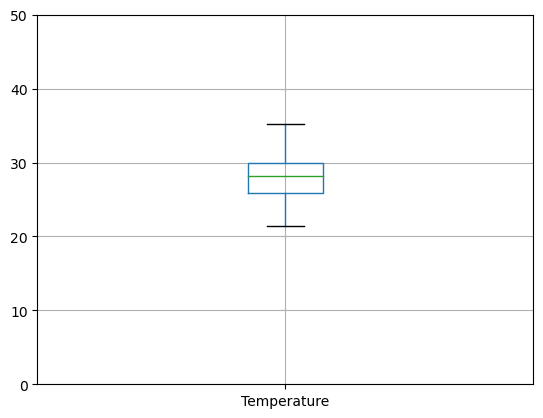

In [10]:
df.boxplot(column='Temperature')
plt.ylim(0,50)
plt.show()

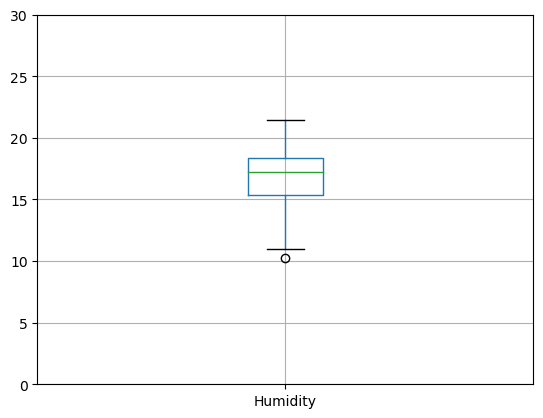

In [11]:
df.boxplot(column='Humidity')
plt.ylim(0,30)
plt.show()

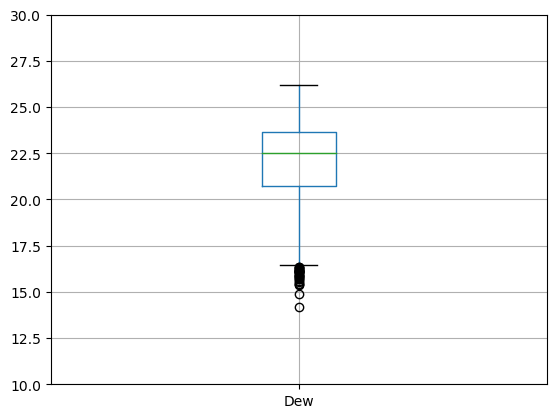

In [12]:
df.boxplot(column='Dew')
plt.ylim(10,30)
plt.show()

In [13]:
df.Dew.min()

14.16

In [14]:
df=df[df['Dew']>=16.5]

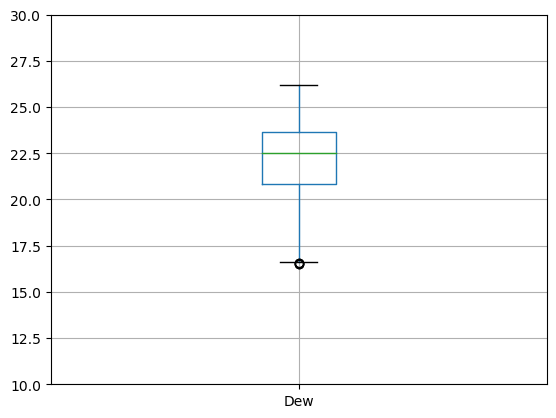

In [15]:
df.boxplot(column='Dew')
plt.ylim(10,30)
plt.show()

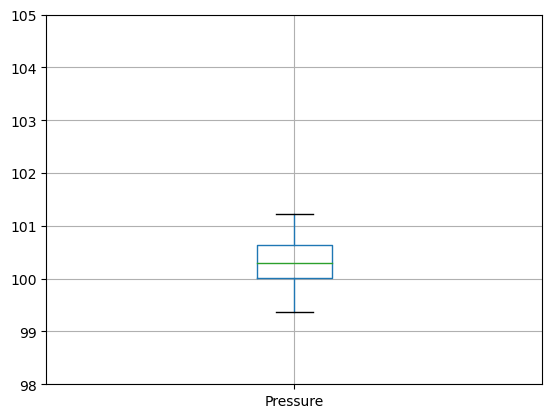

In [16]:
df.boxplot(column='Pressure')
plt.ylim(98,105)
plt.show()

# Correlation Plot

In [17]:
df.corr()

,Temperature,Dew,Humidity,Pressure
Temperature,1.000000,0.463715,0.497182,-0.729277
Dew,0.463715,1.000000,0.996597,-0.570351
Humidity,0.497182,0.996597,1.000000,-0.600535
Pressure,-0.729277,-0.570351,-0.600535,1.000000


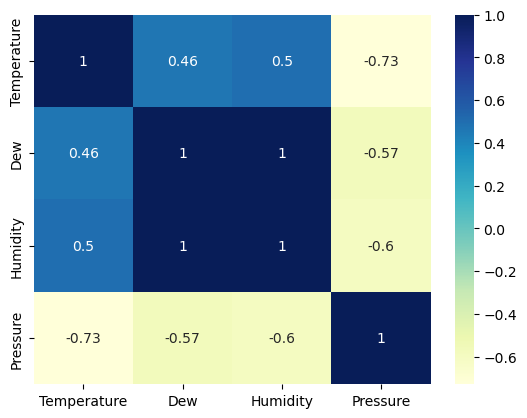

In [18]:
import seaborn  
correlation = df. corr ()  
sns.heatmap(correlation, cmap="YlGnBu", annot=True) 
plt.show()

# Monthly data visualisation

In [19]:
df['date_month'] = df['date'].dt.month

In [20]:
month_grp=df.groupby(['date_month']).mean()

In [21]:
month_grp

,Temperature,Dew,Humidity,Pressure
date_month,,,,
1,25.680492,20.353902,15.080131,100.628557
2,26.886570,20.700542,15.467184,100.552347
3,28.657459,21.080228,15.903322,100.459511
4,29.823980,22.545351,17.346455,100.295251
5,30.185812,23.019286,17.861169,100.079578
6,29.577374,22.236801,17.006532,100.069024
7,28.936091,22.743648,17.490293,100.084821
8,28.433571,23.042662,17.791851,100.130649
9,28.018960,23.129966,17.880336,100.198154


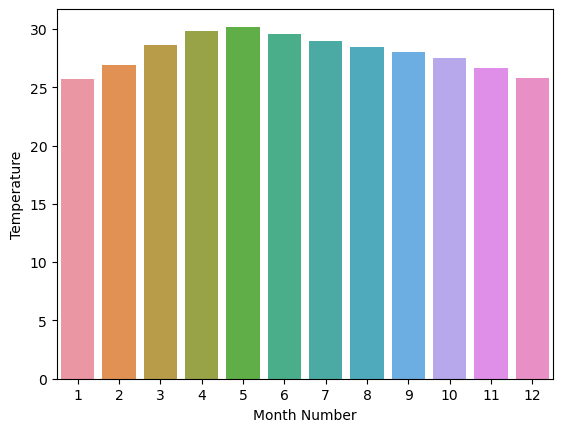

In [22]:
sns.barplot(x=month_grp.index, y='Temperature', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Temperature')
plt.show()

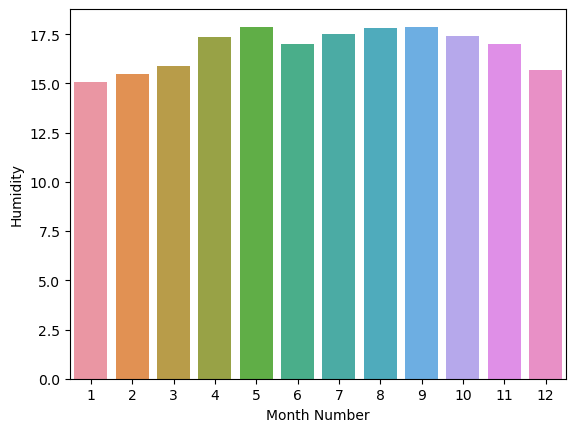

In [23]:
sns.barplot(x=month_grp.index, y='Humidity', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Humidity')
plt.show()

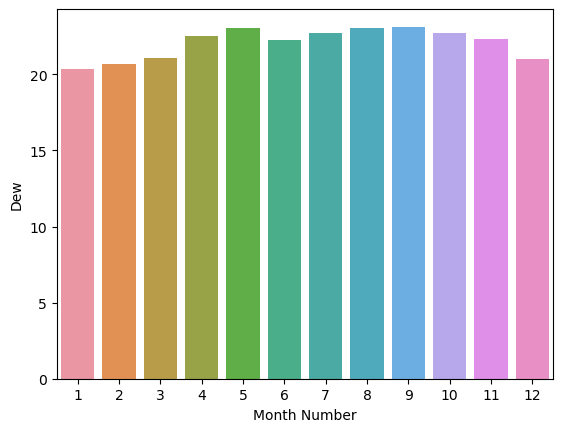

In [24]:
sns.barplot(x=month_grp.index, y='Dew', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Dew')
plt.show()

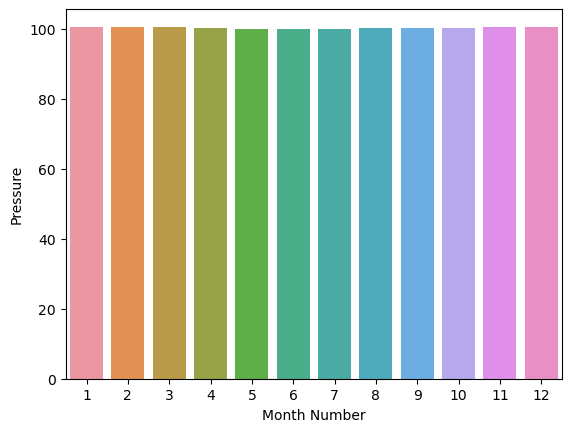

In [25]:
sns.barplot(x=month_grp.index, y='Pressure', data=month_grp)
plt.xlabel('Month Number')
plt.ylabel('Pressure')
plt.show()

# Stationary Check

In [26]:
df

,date,Temperature,Dew,Humidity,Pressure,date_month
0,2012-01-01,25.30,23.26,17.82,100.63,1
1,2012-02-01,25.49,22.97,17.52,100.64,2
2,2012-03-01,25.76,22.97,17.52,100.63,3
3,2012-04-01,25.57,23.01,17.58,100.67,4
4,2012-05-01,25.17,22.40,16.85,100.83,5
...,...,...,...,...,...,...
3648,2021-12-27,24.25,20.08,14.59,100.97,12
3649,2021-12-28,24.00,20.61,15.08,100.90,12
3650,2021-12-29,24.37,20.38,14.89,100.82,12
3651,2021-12-30,24.55,22.05,16.60,100.90,12


In [27]:
df.set_index('date', inplace=True)
data = pd.DataFrame(df.resample('W').mean())
data

,Temperature,Dew,Humidity,Pressure,date_month
date,,,,,
2012-01-01,25.300000,23.260000,17.820000,100.630000,1.000000
2012-01-08,29.162857,21.604286,16.382857,100.131429,1.000000
2012-01-15,25.326667,21.296667,15.993333,100.418333,1.000000
2012-01-22,22.666000,18.190000,13.040000,100.582000,1.000000
2012-01-29,23.372857,18.538571,13.294286,100.714286,1.000000
...,...,...,...,...,...
2021-12-05,26.911429,22.117143,16.864286,100.561429,11.714286
2021-12-12,27.512857,23.252857,17.988571,100.042857,12.000000
2021-12-19,24.647143,21.242857,15.765714,100.781429,12.000000


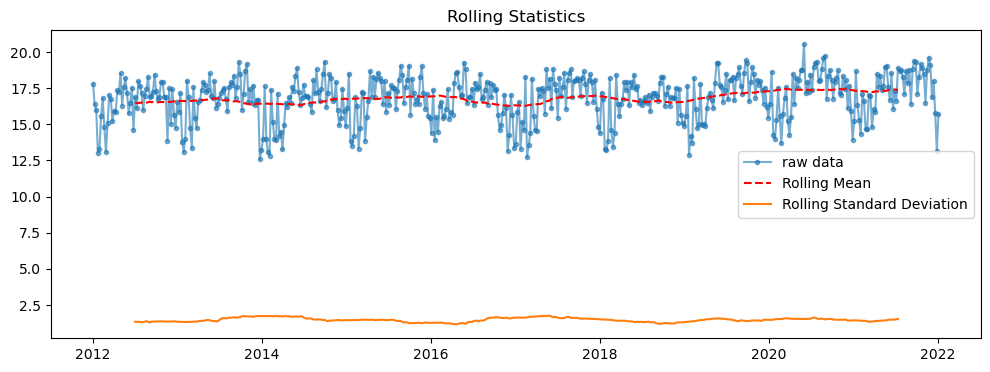

In [28]:
def test_stationarity(timeseries, title):
    roll_mean = timeseries['Humidity'].rolling(window = 52,  center=True).mean()
    roll_std = timeseries['Humidity'].rolling(window = 52,  center=True).std()
    plt.figure(figsize=(12, 4), dpi=100)
    plt.plot(timeseries.Humidity, label= title, marker=".", alpha=0.6)
    plt.plot(roll_mean, label="Rolling Mean", color="red", linestyle="--")
    plt.plot(roll_std, label="Rolling Standard Deviation")
    plt.title("Rolling Statistics")
    plt.legend()
    plt.show()
test_stationarity(data, 'raw data')

# HOLT WINTER'S MODEL

1- Daily Basis

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [30]:
train_size = int(len(df) * 0.8)
train_data1, test_data1 = df[:train_size], df[train_size:]
train_data1.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data1.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data1

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2020-01-01,17.58
2020-02-01,17.64
2020-03-01,17.46


In [31]:
test_data1

,Humidity
date,
2020-06-01,16.78
2020-07-01,16.48
2020-08-01,15.20
2020-09-01,13.98
2020-10-01,14.16
...,...
2021-12-27,14.59
2021-12-28,15.08
2021-12-29,14.89


In [32]:
model = ExponentialSmoothing(train_data1, trend='add', seasonal='add', seasonal_periods=92)
model_fit = model.fit()

Quater 

In [33]:
quater=int(len(test_data1)*0.25) 

In [34]:
test_data1[:quater]

,Humidity
date,
2020-06-01,16.78
2020-07-01,16.48
2020-08-01,15.20
2020-09-01,13.98
2020-10-01,14.16
...,...
2020-01-07,19.35
2020-02-07,17.58
2020-03-07,17.82


In [35]:
forecasted_values11 = model_fit.forecast(quater)
np.array(forecasted_values11).round(2)

array([17.55, 17.3 , 17.2 , 17.11, 17.17, 17.1 , 16.96, 16.84, 16.74,
       16.67, 17.04, 17.22, 17.38, 17.58, 17.24, 17.07, 17.2 , 17.39,
       17.34, 17.26, 17.17, 17.01, 17.23, 17.36, 17.3 , 17.15, 17.1 ,
       17.  , 16.98, 16.94, 17.01, 17.2 , 17.38, 17.33, 17.16, 17.12,
       17.04, 17.28, 17.21, 17.23, 17.21, 17.41, 17.6 , 17.58, 17.6 ,
       17.68, 17.75, 17.48, 17.39, 17.42, 17.47, 17.36, 17.52, 17.58,
       17.76, 17.57, 17.38, 17.47, 17.41, 17.4 , 17.16, 17.29, 17.27,
       17.39, 17.31, 17.17, 17.21, 17.37, 17.44, 17.39, 17.32, 17.36,
       17.37, 17.27, 17.31, 17.3 , 17.19, 17.05, 17.06, 17.15, 17.43,
       17.43, 17.62, 17.78, 17.74, 17.69, 17.47, 17.59, 17.38, 17.33,
       17.45, 17.61, 17.58, 17.33, 17.22, 17.13, 17.2 , 17.12, 16.99,
       16.86, 16.77, 16.7 , 17.06, 17.24, 17.4 , 17.6 , 17.26, 17.1 ,
       17.22, 17.42, 17.37, 17.29, 17.19, 17.04, 17.25, 17.39, 17.32,
       17.17, 17.13, 17.03, 17.  , 16.97, 17.04, 17.22, 17.41, 17.36,
       17.18, 17.15,

In [36]:
actual_values11 = test_data1[:quater]
np.array(actual_values11)

array([[16.78],
       [16.48],
       [15.2 ],
       [13.98],
       [14.16],
       [14.22],
       [15.32],
       [13.31],
       [12.39],
       [12.76],
       [12.88],
       [16.17],
       [16.66],
       [15.87],
       [14.65],
       [14.28],
       [15.2 ],
       [15.08],
       [13.37],
       [12.27],
       [13.12],
       [14.34],
       [15.38],
       [15.08],
       [14.83],
       [15.26],
       [15.75],
       [14.34],
       [14.04],
       [13.92],
       [13.12],
       [13.49],
       [14.34],
       [14.34],
       [15.08],
       [14.34],
       [14.04],
       [14.22],
       [13.79],
       [13.31],
       [12.33],
       [12.02],
       [13.  ],
       [13.49],
       [13.06],
       [13.79],
       [15.32],
       [15.14],
       [14.89],
       [15.5 ],
       [15.99],
       [15.62],
       [15.5 ],
       [15.14],
       [14.71],
       [14.1 ],
       [13.85],
       [14.53],
       [15.44],
       [16.11],
       [15.75],
       [16.11],
       [

In [37]:
rmse11 = mean_squared_error(test_data1[:quater], forecasted_values11, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse11)

Root Mean Squared Error is : 2.311


In [38]:
loss11 = np.sqrt(np.mean(np.square(((test_data1[:quater].Humidity.values - forecasted_values11) / test_data1[:quater].Humidity.values)), axis=0))
print(loss11*100)

15.829340250212088


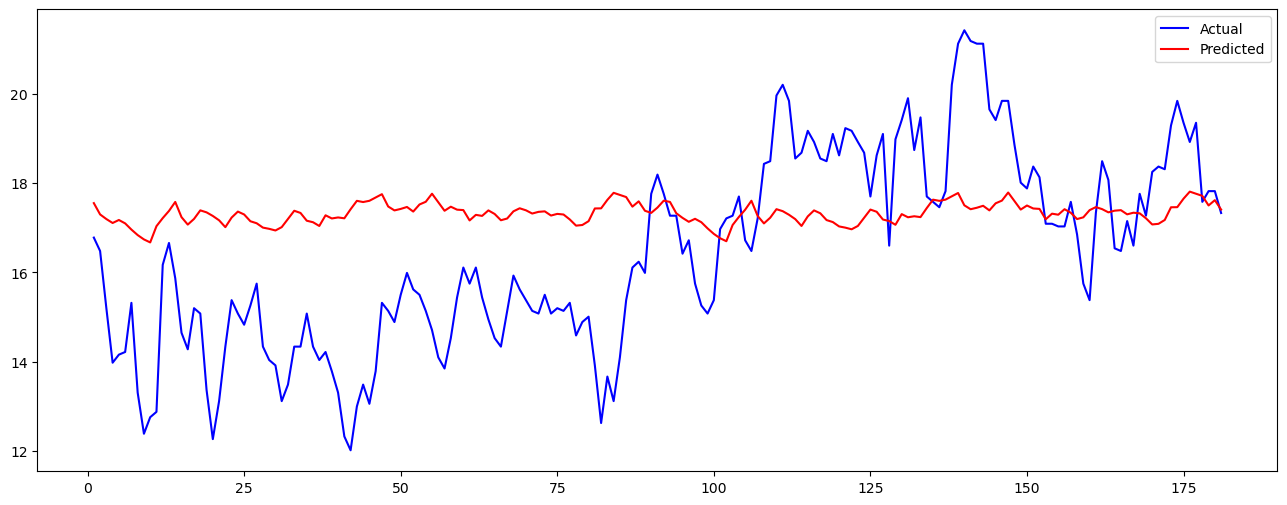

In [39]:
x_labels = range(1, 182)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values11, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values11, color='red', label='Predicted')
plt.legend()
plt.show()

Half

In [40]:
half=int(len(test_data1)*0.5)

In [41]:
test_data1[:half]

,Humidity
date,
2020-06-01,16.78
2020-07-01,16.48
2020-08-01,15.20
2020-09-01,13.98
2020-10-01,14.16
...,...
2020-12-29,15.38
2020-12-30,16.54
2020-12-31,16.42


In [42]:
forecasted_values12 = model_fit.forecast(half)
np.array(forecasted_values12).round(2)

array([17.55, 17.3 , 17.2 , 17.11, 17.17, 17.1 , 16.96, 16.84, 16.74,
       16.67, 17.04, 17.22, 17.38, 17.58, 17.24, 17.07, 17.2 , 17.39,
       17.34, 17.26, 17.17, 17.01, 17.23, 17.36, 17.3 , 17.15, 17.1 ,
       17.  , 16.98, 16.94, 17.01, 17.2 , 17.38, 17.33, 17.16, 17.12,
       17.04, 17.28, 17.21, 17.23, 17.21, 17.41, 17.6 , 17.58, 17.6 ,
       17.68, 17.75, 17.48, 17.39, 17.42, 17.47, 17.36, 17.52, 17.58,
       17.76, 17.57, 17.38, 17.47, 17.41, 17.4 , 17.16, 17.29, 17.27,
       17.39, 17.31, 17.17, 17.21, 17.37, 17.44, 17.39, 17.32, 17.36,
       17.37, 17.27, 17.31, 17.3 , 17.19, 17.05, 17.06, 17.15, 17.43,
       17.43, 17.62, 17.78, 17.74, 17.69, 17.47, 17.59, 17.38, 17.33,
       17.45, 17.61, 17.58, 17.33, 17.22, 17.13, 17.2 , 17.12, 16.99,
       16.86, 16.77, 16.7 , 17.06, 17.24, 17.4 , 17.6 , 17.26, 17.1 ,
       17.22, 17.42, 17.37, 17.29, 17.19, 17.04, 17.25, 17.39, 17.32,
       17.17, 17.13, 17.03, 17.  , 16.97, 17.04, 17.22, 17.41, 17.36,
       17.18, 17.15,

In [43]:
actual_values12 = test_data1[:half]
np.array(actual_values12)

array([[16.78],
       [16.48],
       [15.2 ],
       [13.98],
       [14.16],
       [14.22],
       [15.32],
       [13.31],
       [12.39],
       [12.76],
       [12.88],
       [16.17],
       [16.66],
       [15.87],
       [14.65],
       [14.28],
       [15.2 ],
       [15.08],
       [13.37],
       [12.27],
       [13.12],
       [14.34],
       [15.38],
       [15.08],
       [14.83],
       [15.26],
       [15.75],
       [14.34],
       [14.04],
       [13.92],
       [13.12],
       [13.49],
       [14.34],
       [14.34],
       [15.08],
       [14.34],
       [14.04],
       [14.22],
       [13.79],
       [13.31],
       [12.33],
       [12.02],
       [13.  ],
       [13.49],
       [13.06],
       [13.79],
       [15.32],
       [15.14],
       [14.89],
       [15.5 ],
       [15.99],
       [15.62],
       [15.5 ],
       [15.14],
       [14.71],
       [14.1 ],
       [13.85],
       [14.53],
       [15.44],
       [16.11],
       [15.75],
       [16.11],
       [

In [44]:
rmse12 = mean_squared_error(test_data1[:half], forecasted_values12, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse12)

Root Mean Squared Error is : 2.100


In [45]:
loss12 = np.sqrt(np.mean(np.square(((test_data1[:half].Humidity.values - forecasted_values12) / test_data1[:half].Humidity.values)), axis=0))
print(loss12*100)

13.54737048088778


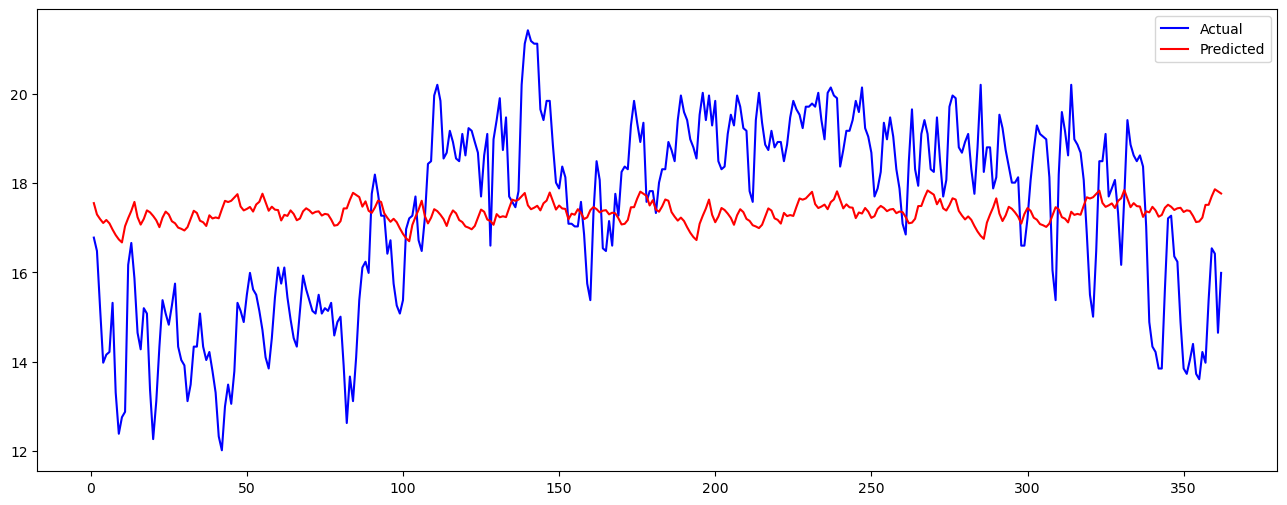

In [46]:
x_labels = range(1, 363)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values12, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values12, color='red', label='Predicted')
plt.legend()
plt.show()

Full

In [47]:
forecasted_values13 = model_fit.forecast(len(test_data1))
np.array(forecasted_values13).round(2)

array([17.55, 17.3 , 17.2 , 17.11, 17.17, 17.1 , 16.96, 16.84, 16.74,
       16.67, 17.04, 17.22, 17.38, 17.58, 17.24, 17.07, 17.2 , 17.39,
       17.34, 17.26, 17.17, 17.01, 17.23, 17.36, 17.3 , 17.15, 17.1 ,
       17.  , 16.98, 16.94, 17.01, 17.2 , 17.38, 17.33, 17.16, 17.12,
       17.04, 17.28, 17.21, 17.23, 17.21, 17.41, 17.6 , 17.58, 17.6 ,
       17.68, 17.75, 17.48, 17.39, 17.42, 17.47, 17.36, 17.52, 17.58,
       17.76, 17.57, 17.38, 17.47, 17.41, 17.4 , 17.16, 17.29, 17.27,
       17.39, 17.31, 17.17, 17.21, 17.37, 17.44, 17.39, 17.32, 17.36,
       17.37, 17.27, 17.31, 17.3 , 17.19, 17.05, 17.06, 17.15, 17.43,
       17.43, 17.62, 17.78, 17.74, 17.69, 17.47, 17.59, 17.38, 17.33,
       17.45, 17.61, 17.58, 17.33, 17.22, 17.13, 17.2 , 17.12, 16.99,
       16.86, 16.77, 16.7 , 17.06, 17.24, 17.4 , 17.6 , 17.26, 17.1 ,
       17.22, 17.42, 17.37, 17.29, 17.19, 17.04, 17.25, 17.39, 17.32,
       17.17, 17.13, 17.03, 17.  , 16.97, 17.04, 17.22, 17.41, 17.36,
       17.18, 17.15,

In [48]:
actual_values13 = test_data1
np.array(actual_values13).round(2)

array([[16.78],
       [16.48],
       [15.2 ],
       [13.98],
       [14.16],
       [14.22],
       [15.32],
       [13.31],
       [12.39],
       [12.76],
       [12.88],
       [16.17],
       [16.66],
       [15.87],
       [14.65],
       [14.28],
       [15.2 ],
       [15.08],
       [13.37],
       [12.27],
       [13.12],
       [14.34],
       [15.38],
       [15.08],
       [14.83],
       [15.26],
       [15.75],
       [14.34],
       [14.04],
       [13.92],
       [13.12],
       [13.49],
       [14.34],
       [14.34],
       [15.08],
       [14.34],
       [14.04],
       [14.22],
       [13.79],
       [13.31],
       [12.33],
       [12.02],
       [13.  ],
       [13.49],
       [13.06],
       [13.79],
       [15.32],
       [15.14],
       [14.89],
       [15.5 ],
       [15.99],
       [15.62],
       [15.5 ],
       [15.14],
       [14.71],
       [14.1 ],
       [13.85],
       [14.53],
       [15.44],
       [16.11],
       [15.75],
       [16.11],
       [

In [49]:
rmse13 = mean_squared_error(test_data1, forecasted_values13, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse13)

Root Mean Squared Error is : 2.027


In [50]:
loss13 = np.sqrt(np.mean(np.square(((test_data1.Humidity.values - forecasted_values13) / test_data1.Humidity.values)), axis=0))
print(loss13*100)

13.260905462598638


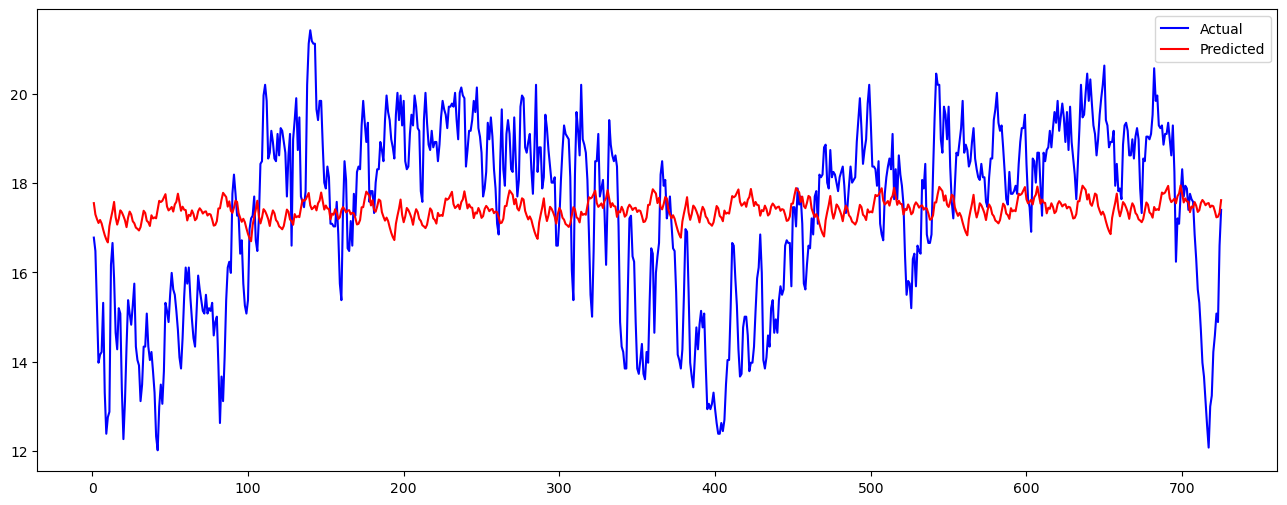

In [51]:
x_labels = range(1, 726)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values13, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values13, color='red', label='Predicted')
plt.legend()
plt.show()

2- Weekly Basis

In [52]:
data = pd.DataFrame(df.resample('W').mean())

In [53]:
train_size2 = int(len(data) * 0.8)
train_data2, test_data2 = data[:train_size2], data[train_size2:]
train_data2.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
test_data2.drop(data.columns.difference(['Humidity']), axis=1, inplace=True)
train_data2

,Humidity
date,
2012-01-01,17.820000
2012-01-08,16.382857
2012-01-15,15.993333
2012-01-22,13.040000
2012-01-29,13.294286
...,...
2019-12-01,17.404286
2019-12-08,16.438571
2019-12-15,17.542857


In [54]:
test_data2

,Humidity
date,
2020-01-05,16.437143
2020-01-12,18.641429
2020-01-19,14.291429
2020-01-26,13.995714
2020-02-02,15.267143
...,...
2021-12-05,16.864286
2021-12-12,17.988571
2021-12-19,15.765714


In [55]:
model2 = ExponentialSmoothing(train_data2, trend='add', seasonal='add', seasonal_periods=53)
model_fit2 = model2.fit()

Quater

In [56]:
quater1=int(len(test_data2)*0.25) 

In [57]:
test_data1[:quater1]

,Humidity
date,
2020-06-01,16.78
2020-07-01,16.48
2020-08-01,15.20
2020-09-01,13.98
2020-10-01,14.16
2020-11-01,14.22
2020-12-01,15.32
2020-01-13,13.31
2020-01-14,12.39


In [58]:
forecasted_values21 = model_fit2.forecast(quater1)
np.array(forecasted_values21).round(2)

array([16.36, 15.84, 16.69, 15.13, 15.49, 15.15, 16.42, 16.  , 15.56,
       14.63, 15.7 , 16.13, 16.46, 15.96, 15.84, 16.03, 16.77, 16.72,
       17.38, 17.45, 17.72, 18.14, 17.97, 18.48, 17.73, 18.14])

In [59]:
actual_values21 = test_data2[:quater1]
np.array(actual_values21).round(2)

array([[16.44],
       [18.64],
       [14.29],
       [14.  ],
       [15.27],
       [17.54],
       [15.58],
       [13.69],
       [15.73],
       [16.8 ],
       [17.58],
       [15.22],
       [14.29],
       [15.52],
       [18.48],
       [16.41],
       [18.21],
       [17.48],
       [18.08],
       [18.76],
       [18.76],
       [20.53],
       [17.13],
       [17.94],
       [17.24],
       [18.44]])

In [60]:
rmse21 = mean_squared_error(test_data2[:quater1], forecasted_values21, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse21)

Root Mean Squared Error is : 1.529


In [61]:
loss21 = np.sqrt(np.mean(np.square(((test_data2[:quater1].Humidity.values - forecasted_values21) / test_data2[:quater1].Humidity.values)), axis=0))
print(loss21*100)

9.188988377804144


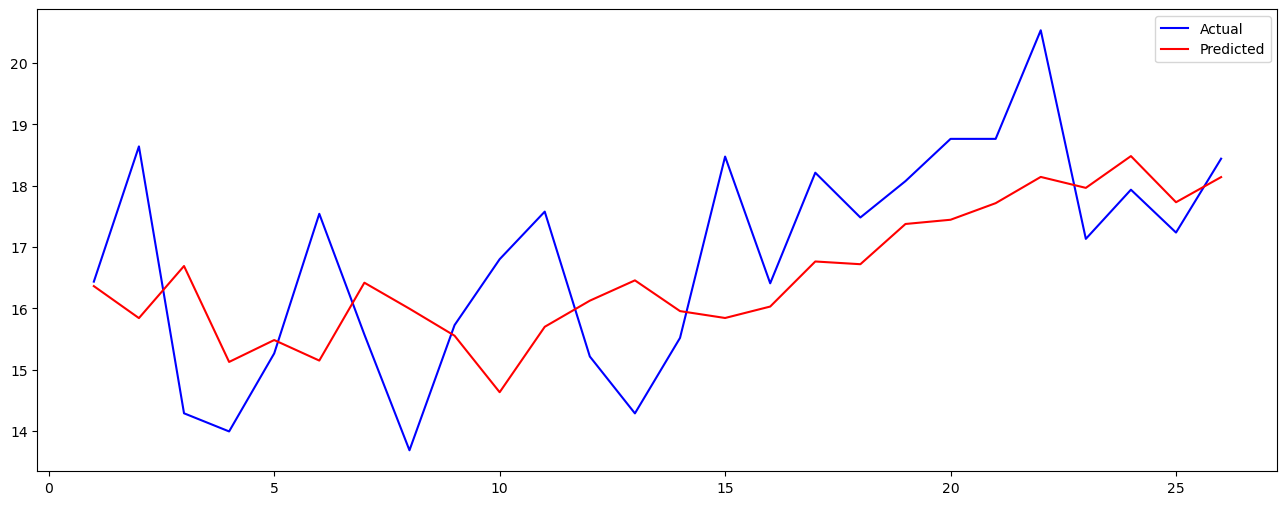

In [62]:
x_labels = range(1, 27)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values21, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values21, color='red', label='Predicted')
plt.legend()
plt.show()

Half

In [63]:
half1=int(len(test_data2)*0.5)

In [64]:
test_data2[:half1]

,Humidity
date,
2020-01-05,16.437143
2020-01-12,18.641429
2020-01-19,14.291429
2020-01-26,13.995714
2020-02-02,15.267143
2020-02-09,17.542857
2020-02-16,15.575000
2020-02-23,13.688571
2020-03-01,15.728571


In [65]:
forecasted_values22 = model_fit2.forecast(half1)
np.array(forecasted_values22).round(2)

array([16.36, 15.84, 16.69, 15.13, 15.49, 15.15, 16.42, 16.  , 15.56,
       14.63, 15.7 , 16.13, 16.46, 15.96, 15.84, 16.03, 16.77, 16.72,
       17.38, 17.45, 17.72, 18.14, 17.97, 18.48, 17.73, 18.14, 17.98,
       17.52, 17.13, 17.46, 17.64, 17.29, 17.79, 17.67, 17.8 , 17.66,
       17.87, 17.92, 18.41, 18.23, 18.03, 17.84, 18.24, 18.34, 17.78,
       17.31, 17.29, 17.84, 18.01, 17.33, 17.44, 16.77])

In [66]:
actual_values22 = test_data2[:half1]
np.array(actual_values22).round(2)

array([[16.44],
       [18.64],
       [14.29],
       [14.  ],
       [15.27],
       [17.54],
       [15.58],
       [13.69],
       [15.73],
       [16.8 ],
       [17.58],
       [15.22],
       [14.29],
       [15.52],
       [18.48],
       [16.41],
       [18.21],
       [17.48],
       [18.08],
       [18.76],
       [18.76],
       [20.53],
       [17.13],
       [17.94],
       [17.24],
       [18.44],
       [17.4 ],
       [18.94],
       [19.26],
       [19.33],
       [17.97],
       [18.09],
       [18.81],
       [19.59],
       [19.72],
       [16.78],
       [18.37],
       [18.75],
       [18.03],
       [16.78],
       [17.95],
       [18.19],
       [18.73],
       [17.13],
       [17.02],
       [18.32],
       [17.42],
       [18.03],
       [16.13],
       [17.64],
       [15.92],
       [13.94]])

In [67]:
rmse22 = mean_squared_error(test_data2[:half1], forecasted_values22, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse22)

Root Mean Squared Error is : 1.399


In [68]:
loss22 = np.sqrt(np.mean(np.square(((test_data2[:half1].Humidity.values - forecasted_values22) / test_data2[:half1].Humidity.values)), axis=0))
print(loss22*100)

8.334874599648376


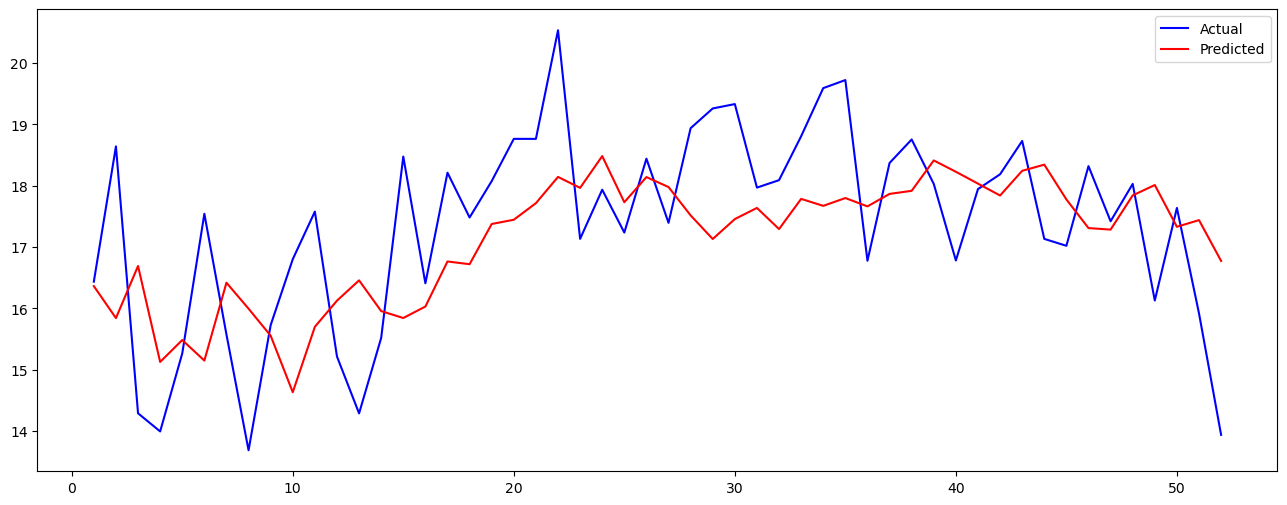

In [69]:
x_labels = range(1, 53)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values22, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values22, color='red', label='Predicted')
plt.legend()
plt.show()

Full

In [70]:
forecasted_values2 = model_fit2.forecast(len(test_data2))
np.array(forecasted_values2).round(2)

array([16.36, 15.84, 16.69, 15.13, 15.49, 15.15, 16.42, 16.  , 15.56,
       14.63, 15.7 , 16.13, 16.46, 15.96, 15.84, 16.03, 16.77, 16.72,
       17.38, 17.45, 17.72, 18.14, 17.97, 18.48, 17.73, 18.14, 17.98,
       17.52, 17.13, 17.46, 17.64, 17.29, 17.79, 17.67, 17.8 , 17.66,
       17.87, 17.92, 18.41, 18.23, 18.03, 17.84, 18.24, 18.34, 17.78,
       17.31, 17.29, 17.84, 18.01, 17.33, 17.44, 16.77, 16.22, 16.45,
       15.93, 16.77, 15.21, 15.57, 15.23, 16.5 , 16.08, 15.64, 14.72,
       15.78, 16.21, 16.54, 16.04, 15.93, 16.11, 16.85, 16.8 , 17.46,
       17.53, 17.8 , 18.23, 18.05, 18.57, 17.81, 18.22, 18.06, 17.6 ,
       17.22, 17.54, 17.72, 17.38, 17.87, 17.76, 17.88, 17.75, 17.95,
       18.  , 18.5 , 18.31, 18.12, 17.92, 18.33, 18.43, 17.86, 17.39,
       17.37, 17.93, 18.09, 17.41, 17.52, 16.86])

In [71]:
actual_values2 = test_data2
np.array(actual_values2).round(2)

array([[16.44],
       [18.64],
       [14.29],
       [14.  ],
       [15.27],
       [17.54],
       [15.58],
       [13.69],
       [15.73],
       [16.8 ],
       [17.58],
       [15.22],
       [14.29],
       [15.52],
       [18.48],
       [16.41],
       [18.21],
       [17.48],
       [18.08],
       [18.76],
       [18.76],
       [20.53],
       [17.13],
       [17.94],
       [17.24],
       [18.44],
       [17.4 ],
       [18.94],
       [19.26],
       [19.33],
       [17.97],
       [18.09],
       [18.81],
       [19.59],
       [19.72],
       [16.78],
       [18.37],
       [18.75],
       [18.03],
       [16.78],
       [17.95],
       [18.19],
       [18.73],
       [17.13],
       [17.02],
       [18.32],
       [17.42],
       [18.03],
       [16.13],
       [17.64],
       [15.92],
       [13.94],
       [15.25],
       [18.66],
       [16.31],
       [15.29],
       [14.32],
       [17.08],
       [16.6 ],
       [14.68],
       [14.66],
       [17.03],
       [

In [72]:
rmse2 = mean_squared_error(test_data2, forecasted_values2, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse2)

Root Mean Squared Error is : 1.432


In [73]:
loss2 = np.sqrt(np.mean(np.square(((test_data2.Humidity.values - forecasted_values2) / test_data2.Humidity.values)), axis=0))
print(loss2*100)

8.670171814757149


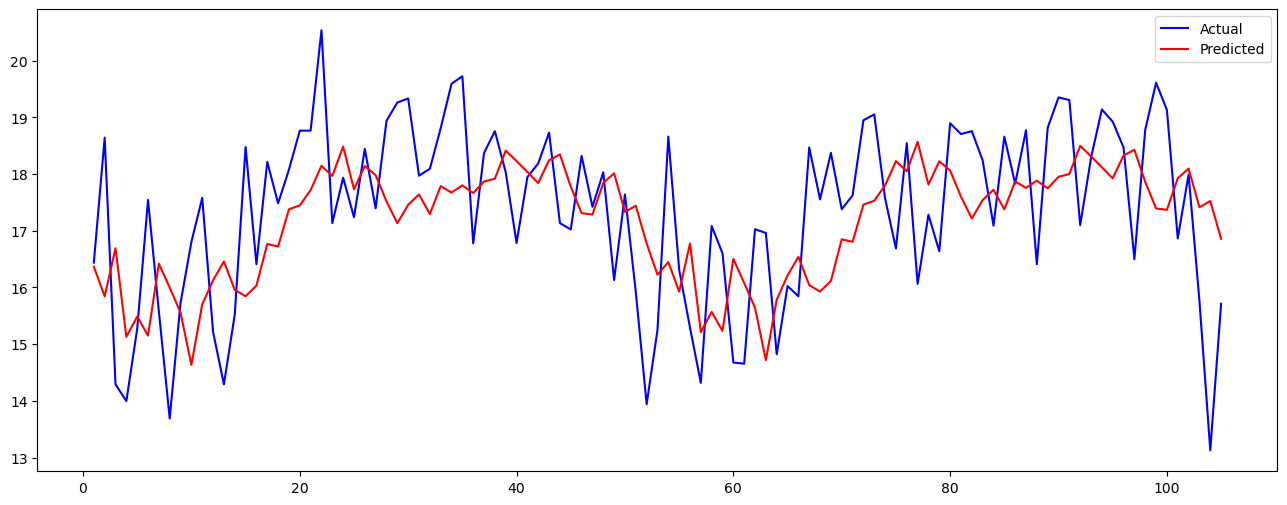

In [74]:
x_labels = range(1, 106)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values2, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values2, color='red', label='Predicted')
plt.legend()
plt.show()

3- Monthly Basis

In [75]:
data3 = pd.DataFrame(df.resample('M').mean())

In [76]:
train_size3 = int(len(data3) * 0.8)
train_data3, test_data3 = data3[:train_size3], data3[train_size3:]
train_data3.drop(data3.columns.difference(['Humidity']), axis=1, inplace=True)
test_data3.drop(data3.columns.difference(['Humidity']), axis=1, inplace=True)
train_data3

,Humidity
date,
2012-01-31,14.757500
2012-02-29,15.247037
2012-03-31,16.119677
2012-04-30,17.304667
2012-05-31,17.130000
...,...
2019-08-31,18.183226
2019-09-30,18.326667
2019-10-31,18.060000


In [77]:
test_data3

,Humidity
date,
2020-01-31,15.668710
2020-02-29,15.596071
2020-03-31,15.867742
2020-04-30,17.645000
2020-05-31,18.680968
2020-06-30,17.783667
2020-07-31,18.789032
2020-08-31,18.806129
2020-09-30,18.039333


In [78]:
model3 = ExponentialSmoothing(train_data3, trend='add', seasonal='add', seasonal_periods=24)
model_fit3 = model3.fit()

Quater

In [79]:
quater2=int(len(test_data3)*0.25)

In [80]:
test_data3[:quater2]

,Humidity
date,
2020-01-31,15.668710
2020-02-29,15.596071
2020-03-31,15.867742
2020-04-30,17.645000
2020-05-31,18.680968
2020-06-30,17.783667


In [81]:
forecasted_values31 = model_fit3.forecast(quater2)
np.array(forecasted_values31).round(2)

array([15.41, 15.98, 16.55, 17.88, 18.26, 17.3 ])

In [82]:
actual_values31 = test_data3[:quater2]
np.array(actual_values31).round(2)

array([[15.67],
       [15.6 ],
       [15.87],
       [17.64],
       [18.68],
       [17.78]])

In [83]:
rmse31 = mean_squared_error(test_data3[:quater2], forecasted_values31, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse31)

Root Mean Squared Error is : 0.438


In [84]:
loss31 = np.sqrt(np.mean(np.square(((test_data3[:quater2].Humidity.values - forecasted_values31) / test_data3[:quater2].Humidity.values)), axis=0))
print(loss31*100)

2.634351931614073


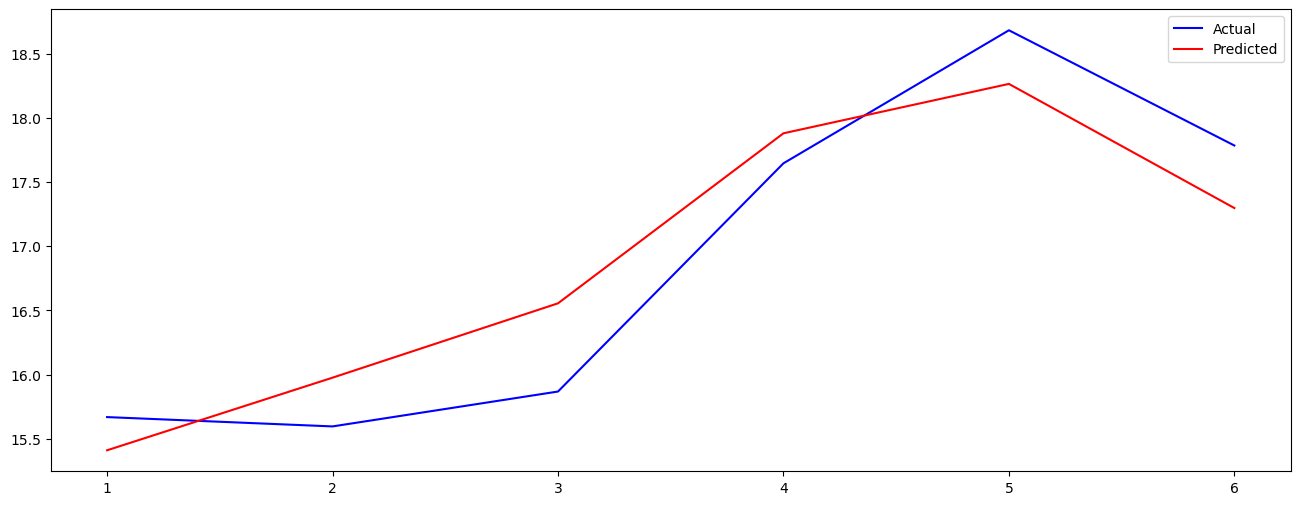

In [85]:
x_labels = range(1, 7)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values31, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values31, color='red', label='Predicted')
plt.legend()
plt.show()

Half

In [86]:
half2=int(len(test_data3)*0.5)

In [87]:
test_data3[:half2]

,Humidity
date,
2020-01-31,15.668710
2020-02-29,15.596071
2020-03-31,15.867742
2020-04-30,17.645000
2020-05-31,18.680968
2020-06-30,17.783667
2020-07-31,18.789032
2020-08-31,18.806129
2020-09-30,18.039333


In [88]:
forecasted_values32 = model_fit3.forecast(half2)
np.array(forecasted_values32).round(2)

array([15.41, 15.98, 16.55, 17.88, 18.26, 17.3 , 17.63, 17.89, 18.18,
       17.47, 16.57, 16.29])

In [89]:
actual_values32 = test_data3[:half2]
np.array(actual_values32).round(2)

array([[15.67],
       [15.6 ],
       [15.87],
       [17.64],
       [18.68],
       [17.78],
       [18.79],
       [18.81],
       [18.04],
       [17.73],
       [17.57],
       [15.82]])

In [90]:
rmse32 = mean_squared_error(test_data3[:half2], forecasted_values32, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse32)

Root Mean Squared Error is : 0.622


In [91]:
loss32 = np.sqrt(np.mean(np.square(((test_data3[:half2].Humidity.values - forecasted_values32) / test_data3[:half2].Humidity.values)), axis=0))
print(loss32*100)

3.505719941032109


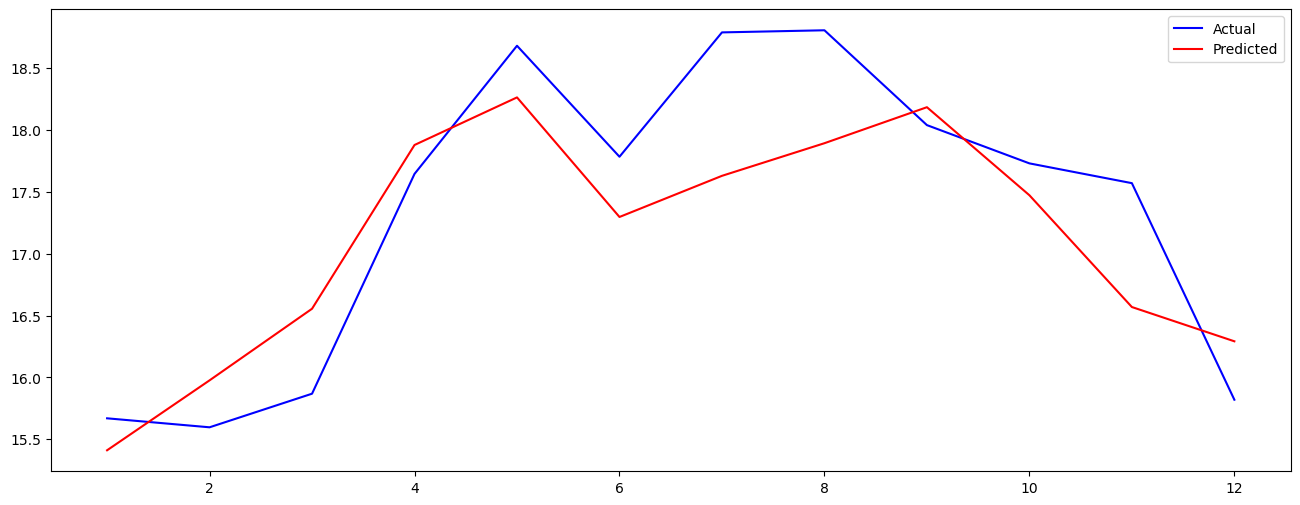

In [92]:
x_labels = range(1, 13)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values32, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values32, color='red', label='Predicted')
plt.legend()
plt.show()

Full

In [93]:
forecasted_values33 = model_fit3.forecast(len(test_data3))
np.array(forecasted_values33).round(2)

array([15.41, 15.98, 16.55, 17.88, 18.26, 17.3 , 17.63, 17.89, 18.18,
       17.47, 16.57, 16.29, 15.57, 16.05, 16.39, 17.86, 18.4 , 17.69,
       18.04, 18.59, 18.59, 18.21, 18.07, 16.2 ])

In [94]:
actual_values33 = test_data3
np.array(actual_values33).round(2)

array([[15.67],
       [15.6 ],
       [15.87],
       [17.64],
       [18.68],
       [17.78],
       [18.79],
       [18.81],
       [18.04],
       [17.73],
       [17.57],
       [15.82],
       [16.02],
       [15.75],
       [16.25],
       [17.74],
       [18.13],
       [17.21],
       [18.26],
       [18.03],
       [18.52],
       [18.41],
       [18.53],
       [15.71]])

In [96]:
rmse33 = mean_squared_error(test_data3, forecasted_values33, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse33)

Root Mean Squared Error is : 0.506


In [98]:
loss33 = np.sqrt(np.mean(np.square(((test_data3.Humidity.values - forecasted_values33) / test_data3.Humidity.values)), axis=0))
print(loss33*100)

2.878829346616981


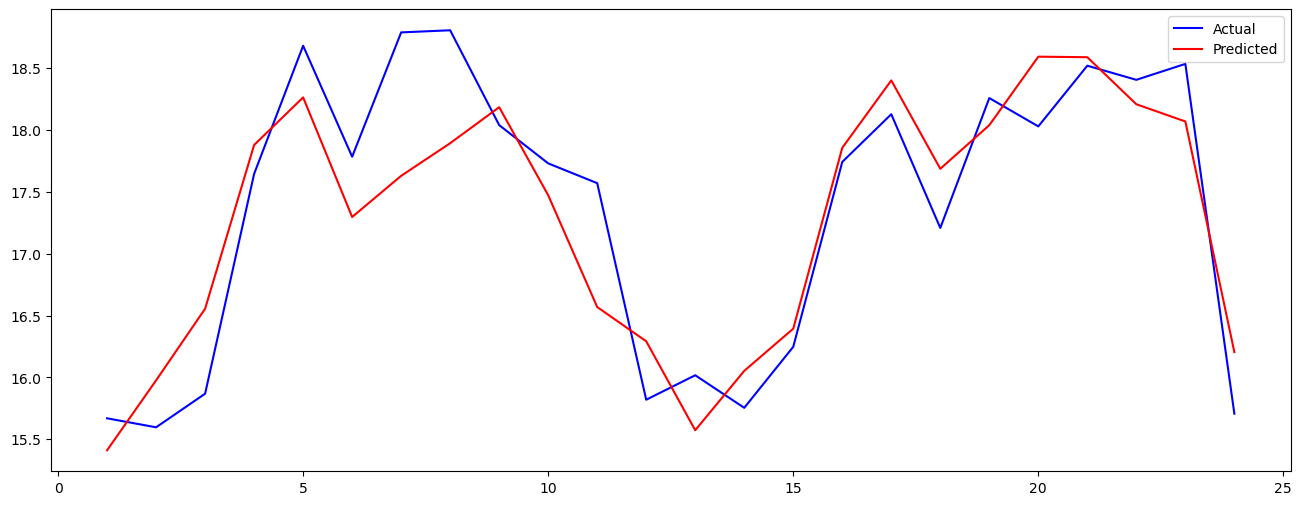

In [99]:
x_labels = range(1, 25)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values33, color='blue', label='Actual')
plt.plot(x_labels, forecasted_values33, color='red', label='Predicted')
plt.legend()
plt.show()

# ARIMA MODEL

1- Daily Basis

In [100]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [101]:
train_data1

,Humidity
date,
2012-01-01,17.82
2012-02-01,17.52
2012-03-01,17.52
2012-04-01,17.58
2012-05-01,16.85
...,...
2020-01-01,17.58
2020-02-01,17.64
2020-03-01,17.46


In [102]:
test_data1

,Humidity
date,
2020-06-01,16.78
2020-07-01,16.48
2020-08-01,15.20
2020-09-01,13.98
2020-10-01,14.16
...,...
2021-12-27,14.59
2021-12-28,15.08
2021-12-29,14.89


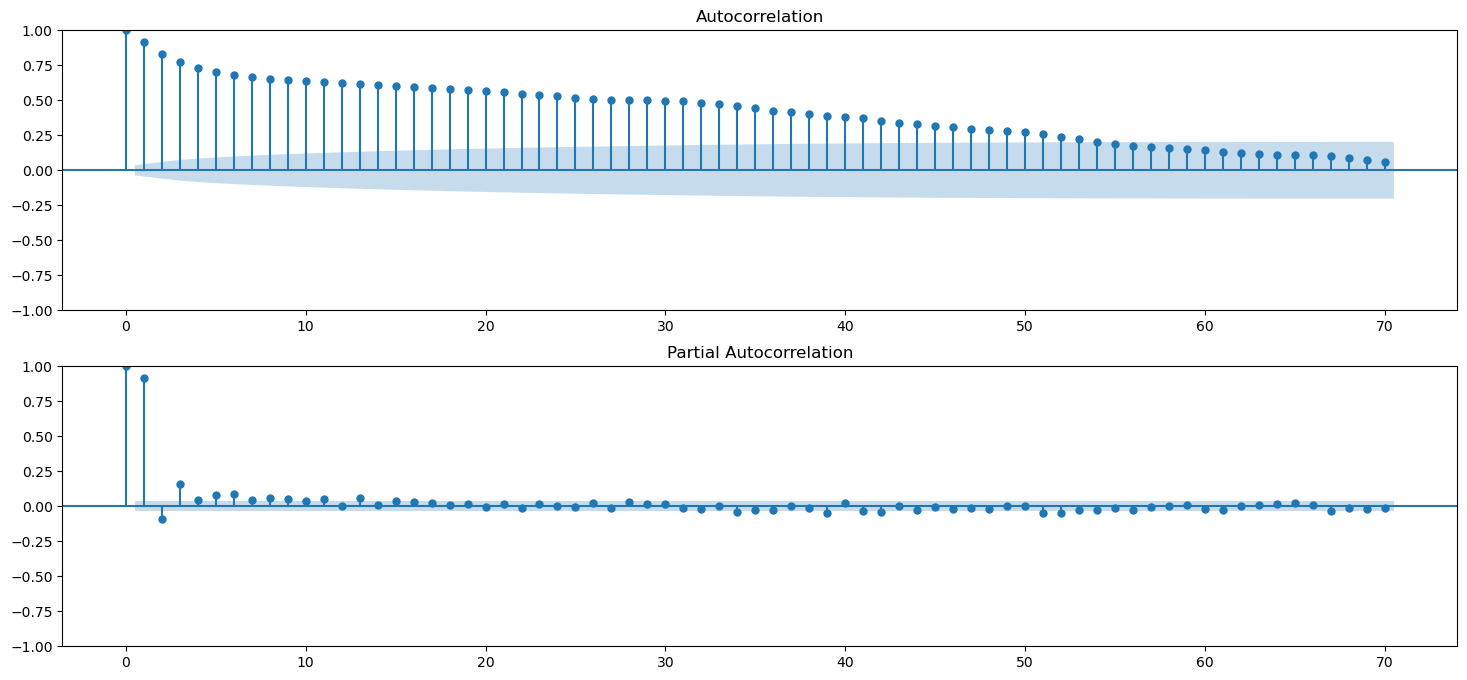

In [104]:
fig, ax = plt.subplots(2, 1, figsize=(18,8))
plot_acf(train_data1, lags=70, ax=ax[0])
plot_pacf(train_data1, lags=70, ax=ax[1])
plt.show()

In [133]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data1['Humidity'], order=(60,1,17))

In [134]:
results = model.fit()

Quater

In [136]:
predictions11 = results.forecast(quater)
np.array(predictions11).round(2)

array([17.2 , 17.05, 16.72, 16.48, 16.47, 16.4 , 16.33, 16.33, 16.4 ,
       16.24, 16.32, 16.52, 16.55, 16.65, 16.7 , 16.59, 16.53, 16.59,
       16.4 , 16.33, 16.38, 16.41, 16.54, 16.53, 16.53, 16.65, 16.73,
       16.81, 16.96, 17.08, 17.09, 17.05, 17.  , 16.86, 16.73, 16.65,
       16.71, 16.73, 16.78, 16.77, 16.66, 16.64, 16.7 , 16.76, 16.84,
       16.96, 17.05, 17.09, 17.07, 16.92, 16.75, 16.67, 16.65, 16.69,
       16.72, 16.71, 16.64, 16.64, 16.69, 16.73, 16.83, 16.95, 17.07,
       17.17, 17.19, 17.1 , 17.  , 16.95, 16.95, 16.98, 16.96, 16.89,
       16.82, 16.76, 16.72, 16.7 , 16.74, 16.81, 16.91, 17.01, 17.03,
       16.98, 16.93, 16.92, 16.95, 16.99, 17.01, 16.99, 16.94, 16.9 ,
       16.84, 16.8 , 16.79, 16.83, 16.91, 16.98, 16.98, 16.94, 16.91,
       16.9 , 16.93, 16.98, 17.  , 17.  , 16.99, 16.96, 16.92, 16.88,
       16.86, 16.89, 16.94, 16.98, 16.97, 16.93, 16.89, 16.88, 16.9 ,
       16.92, 16.93, 16.94, 16.95, 16.94, 16.91, 16.87, 16.87, 16.9 ,
       16.95, 16.98,

In [137]:
rmse11 = mean_squared_error(test_data1[:quater], predictions11, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse11)

Root Mean Squared Error is : 2.141


In [138]:
loss11 = np.sqrt(np.mean(np.square(((test_data1[:quater].Humidity.values - predictions11) / test_data1[:quater].Humidity.values)), axis=0))
print(loss11*100)

14.067882067365026


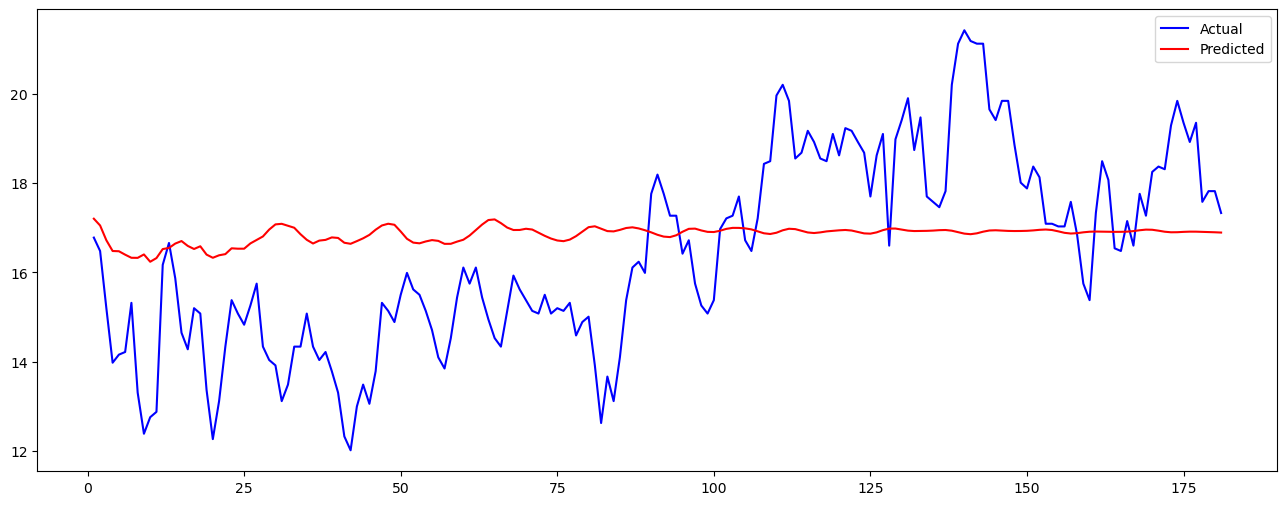

In [139]:
x_labels = range(1, 182)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values11, color='blue', label='Actual')
plt.plot(x_labels, predictions11, color='red', label='Predicted')
plt.legend()
plt.show()

Half

In [140]:
predictions12 = results.forecast(half)
np.array(predictions12).round(2)

array([17.2 , 17.05, 16.72, 16.48, 16.47, 16.4 , 16.33, 16.33, 16.4 ,
       16.24, 16.32, 16.52, 16.55, 16.65, 16.7 , 16.59, 16.53, 16.59,
       16.4 , 16.33, 16.38, 16.41, 16.54, 16.53, 16.53, 16.65, 16.73,
       16.81, 16.96, 17.08, 17.09, 17.05, 17.  , 16.86, 16.73, 16.65,
       16.71, 16.73, 16.78, 16.77, 16.66, 16.64, 16.7 , 16.76, 16.84,
       16.96, 17.05, 17.09, 17.07, 16.92, 16.75, 16.67, 16.65, 16.69,
       16.72, 16.71, 16.64, 16.64, 16.69, 16.73, 16.83, 16.95, 17.07,
       17.17, 17.19, 17.1 , 17.  , 16.95, 16.95, 16.98, 16.96, 16.89,
       16.82, 16.76, 16.72, 16.7 , 16.74, 16.81, 16.91, 17.01, 17.03,
       16.98, 16.93, 16.92, 16.95, 16.99, 17.01, 16.99, 16.94, 16.9 ,
       16.84, 16.8 , 16.79, 16.83, 16.91, 16.98, 16.98, 16.94, 16.91,
       16.9 , 16.93, 16.98, 17.  , 17.  , 16.99, 16.96, 16.92, 16.88,
       16.86, 16.89, 16.94, 16.98, 16.97, 16.93, 16.89, 16.88, 16.9 ,
       16.92, 16.93, 16.94, 16.95, 16.94, 16.91, 16.87, 16.87, 16.9 ,
       16.95, 16.98,

In [141]:
rmse12 = mean_squared_error(test_data1[:half], predictions12, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse12)

Root Mean Squared Error is : 2.114


In [142]:
loss12 = np.sqrt(np.mean(np.square(((test_data1[:half].Humidity.values - predictions12) / test_data1[:half].Humidity.values)), axis=0))
print(loss12*100)

12.872836997012657


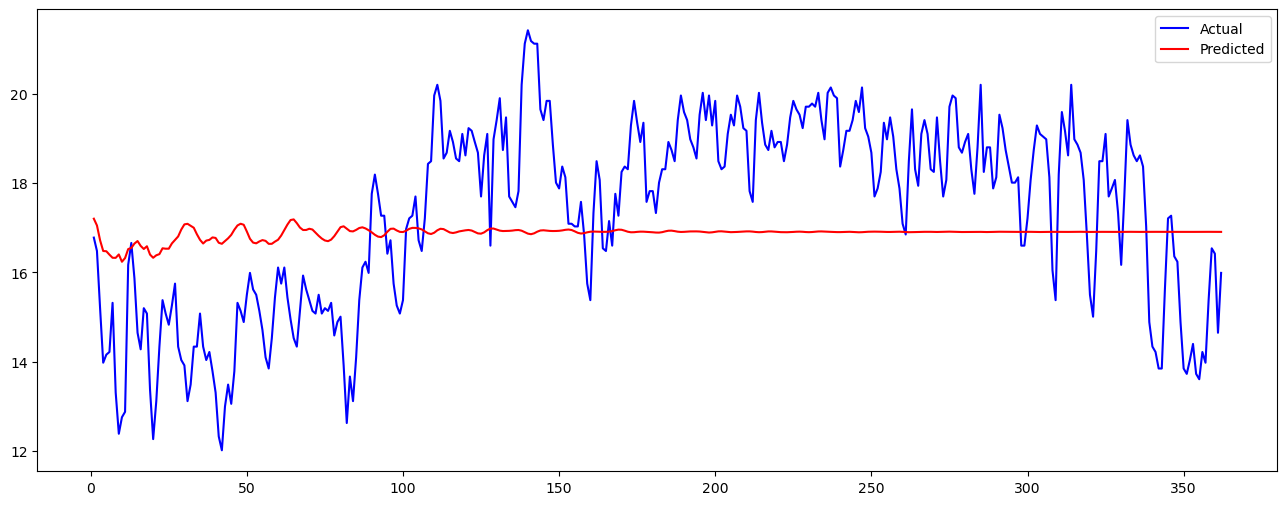

In [145]:
x_labels = range(1, 363)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values12, color='blue', label='Actual')
plt.plot(x_labels, predictions12, color='red', label='Predicted')
plt.legend()
plt.show()

Full

In [146]:
predictions = results.forecast(len(test_data1))
np.array(predictions).round(2)

array([17.2 , 17.05, 16.72, 16.48, 16.47, 16.4 , 16.33, 16.33, 16.4 ,
       16.24, 16.32, 16.52, 16.55, 16.65, 16.7 , 16.59, 16.53, 16.59,
       16.4 , 16.33, 16.38, 16.41, 16.54, 16.53, 16.53, 16.65, 16.73,
       16.81, 16.96, 17.08, 17.09, 17.05, 17.  , 16.86, 16.73, 16.65,
       16.71, 16.73, 16.78, 16.77, 16.66, 16.64, 16.7 , 16.76, 16.84,
       16.96, 17.05, 17.09, 17.07, 16.92, 16.75, 16.67, 16.65, 16.69,
       16.72, 16.71, 16.64, 16.64, 16.69, 16.73, 16.83, 16.95, 17.07,
       17.17, 17.19, 17.1 , 17.  , 16.95, 16.95, 16.98, 16.96, 16.89,
       16.82, 16.76, 16.72, 16.7 , 16.74, 16.81, 16.91, 17.01, 17.03,
       16.98, 16.93, 16.92, 16.95, 16.99, 17.01, 16.99, 16.94, 16.9 ,
       16.84, 16.8 , 16.79, 16.83, 16.91, 16.98, 16.98, 16.94, 16.91,
       16.9 , 16.93, 16.98, 17.  , 17.  , 16.99, 16.96, 16.92, 16.88,
       16.86, 16.89, 16.94, 16.98, 16.97, 16.93, 16.89, 16.88, 16.9 ,
       16.92, 16.93, 16.94, 16.95, 16.94, 16.91, 16.87, 16.87, 16.9 ,
       16.95, 16.98,

In [147]:
rmse = mean_squared_error(test_data1, predictions, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse)

Root Mean Squared Error is : 2.071


In [148]:
loss = np.sqrt(np.mean(np.square(((test_data1.Humidity.values - predictions) / test_data1.Humidity.values)), axis=0))
print(loss*100)

12.776314617627813


<Figure size 1600x600 with 0 Axes>

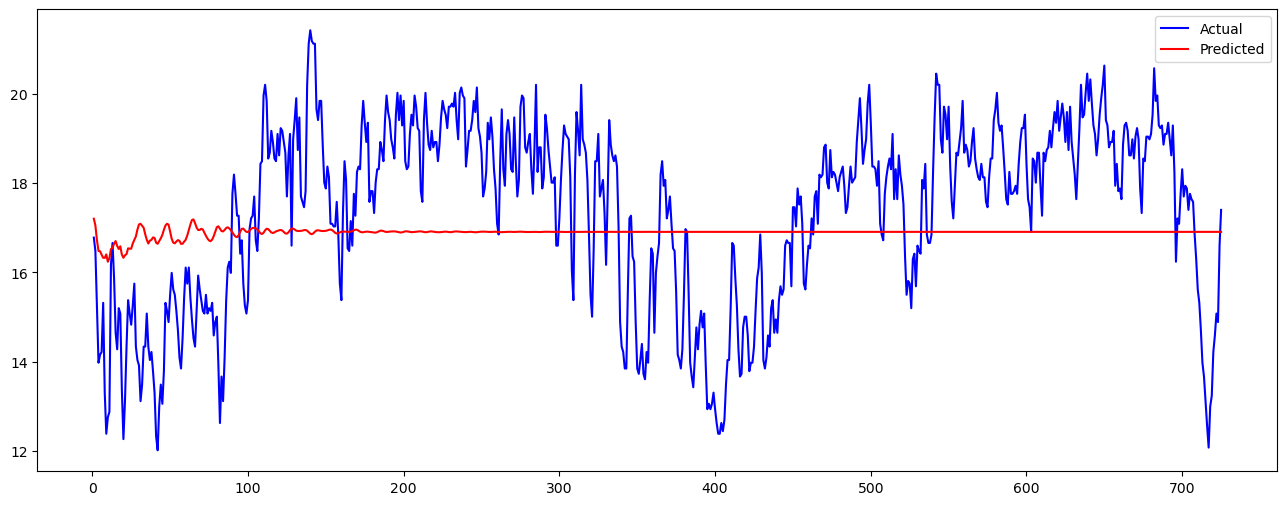

In [150]:
x_labels = range(1, 726)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values13, color='blue', label='Actual')
plt.plot(x_labels, predictions, color='red', label='Predicted')
plt.legend()
plt.show()

2- Weekly Basis

In [151]:
train_data2

,Humidity
date,
2012-01-01,17.820000
2012-01-08,16.382857
2012-01-15,15.993333
2012-01-22,13.040000
2012-01-29,13.294286
...,...
2019-12-01,17.404286
2019-12-08,16.438571
2019-12-15,17.542857


In [152]:
test_data2

,Humidity
date,
2020-01-05,16.437143
2020-01-12,18.641429
2020-01-19,14.291429
2020-01-26,13.995714
2020-02-02,15.267143
...,...
2021-12-05,16.864286
2021-12-12,17.988571
2021-12-19,15.765714


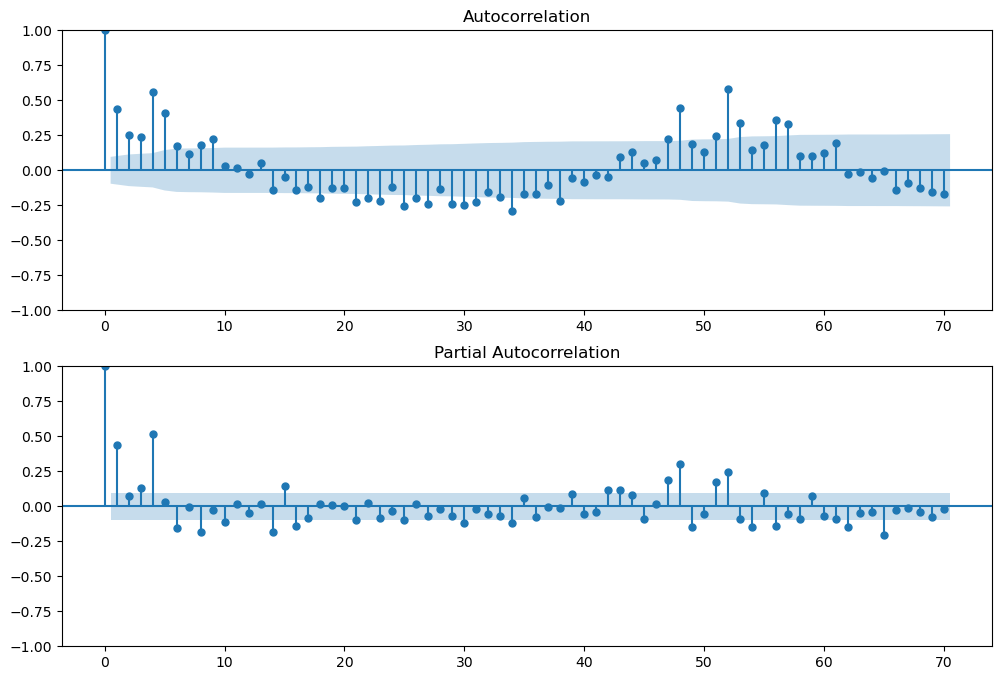

In [153]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_data2, lags=70, ax=ax[0])
plot_pacf(train_data2, lags=70, ax=ax[1])
plt.show()

In [120]:
model2 = ARIMA(train_data2['Humidity'], order=(48,1,18))
results2 = model2.fit()

Quater

In [155]:
predictions21 = results2.forecast(quater1)
np.array(predictions21).round(2)

array([15.05, 17.18, 14.86, 14.32, 15.  , 17.33, 15.13, 14.39, 14.71,
       16.64, 15.93, 15.19, 15.6 , 15.82, 17.25, 16.71, 17.53, 16.34,
       17.42, 16.78, 17.84, 17.27, 16.75, 17.11, 17.57, 18.04])

In [156]:
rmse21 = mean_squared_error(test_data2[:quater1], predictions21, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse21)

Root Mean Squared Error is : 1.097


In [157]:
loss21 = np.sqrt(np.mean(np.square(((test_data2[:quater1].Humidity.values - predictions21) / test_data2[:quater1].Humidity.values)), axis=0))
print(loss21*100)

6.055845052935552


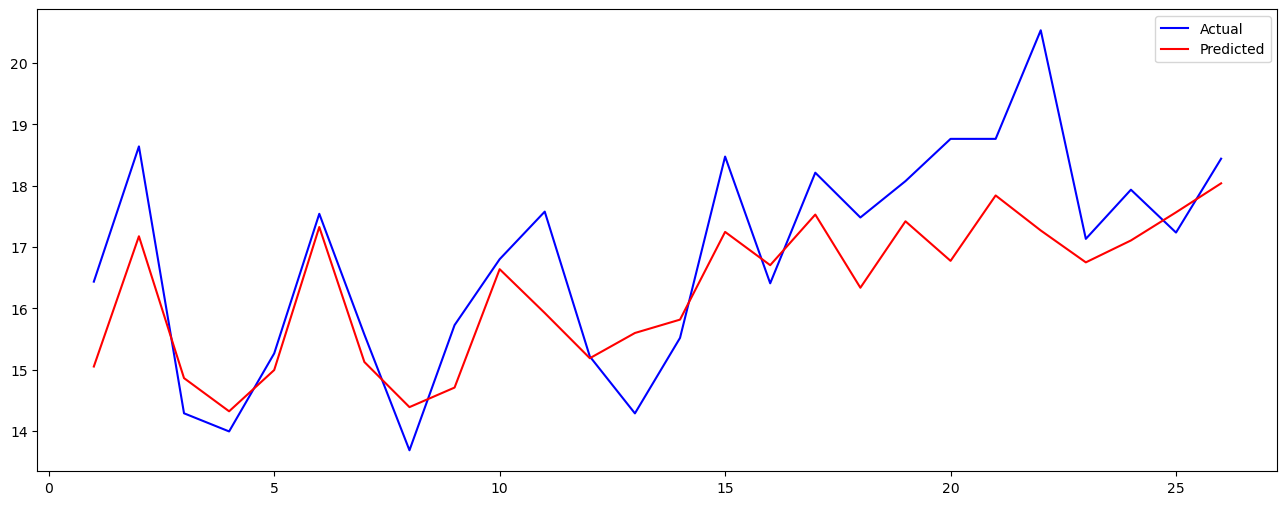

In [160]:
x_labels = range(1, 27)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values21, color='blue', label='Actual')
plt.plot(x_labels, predictions21, color='red', label='Predicted')
plt.legend()
plt.show()

Half

In [161]:
predictions22 = results2.forecast(half1)
np.array(predictions22).round(2)

array([15.05, 17.18, 14.86, 14.32, 15.  , 17.33, 15.13, 14.39, 14.71,
       16.64, 15.93, 15.19, 15.6 , 15.82, 17.25, 16.71, 17.53, 16.34,
       17.42, 16.78, 17.84, 17.27, 16.75, 17.11, 17.57, 18.04, 16.78,
       17.84, 17.53, 18.09, 16.69, 17.4 , 17.49, 18.49, 17.72, 16.79,
       18.22, 19.04, 18.89, 16.77, 18.06, 18.51, 18.83, 17.21, 17.46,
       18.01, 18.17, 17.32, 16.69, 17.66, 16.5 , 16.05])

In [162]:
rmse22 = mean_squared_error(test_data2[:half1], predictions22, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse22)

Root Mean Squared Error is : 1.017


In [163]:
loss22 = np.sqrt(np.mean(np.square(((test_data2[:half1].Humidity.values - predictions22) / test_data2[:half1].Humidity.values)), axis=0))
print(loss22*100)

5.711834602014261


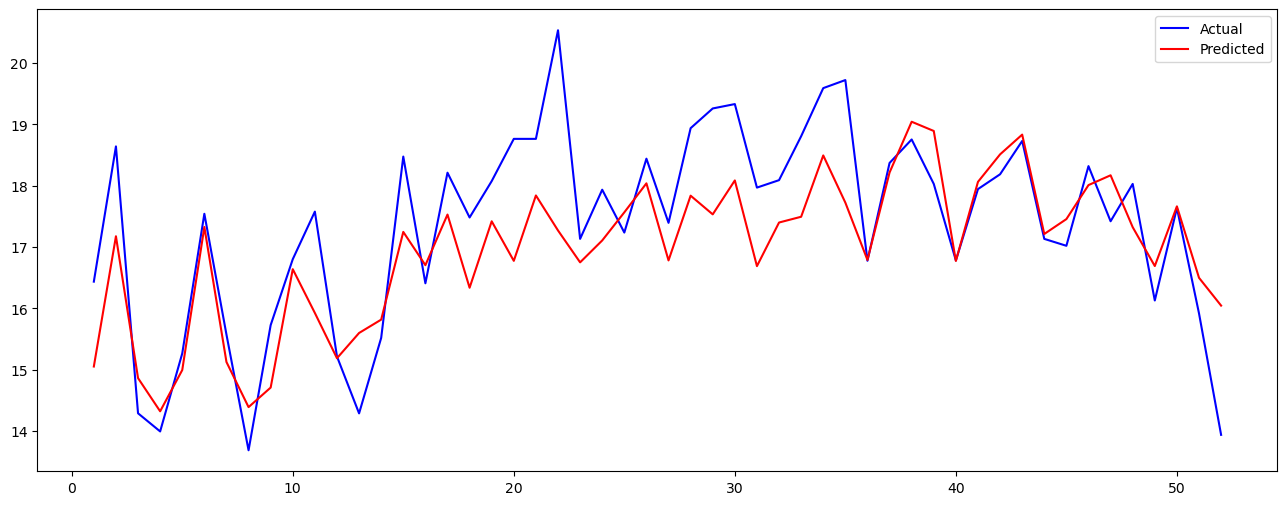

In [168]:
x_labels = range(1, 53)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values22, color='blue', label='Actual')
plt.plot(x_labels, predictions22, color='red', label='Predicted')
plt.legend()
plt.show()

Full

In [169]:
predictions2 = results2.forecast(len(test_data2))
np.array(predictions2).round(2)

array([15.05, 17.18, 14.86, 14.32, 15.  , 17.33, 15.13, 14.39, 14.71,
       16.64, 15.93, 15.19, 15.6 , 15.82, 17.25, 16.71, 17.53, 16.34,
       17.42, 16.78, 17.84, 17.27, 16.75, 17.11, 17.57, 18.04, 16.78,
       17.84, 17.53, 18.09, 16.69, 17.4 , 17.49, 18.49, 17.72, 16.79,
       18.22, 19.04, 18.89, 16.77, 18.06, 18.51, 18.83, 17.21, 17.46,
       18.01, 18.17, 17.32, 16.69, 17.66, 16.5 , 16.05, 15.67, 17.24,
       15.53, 14.83, 15.31, 17.01, 15.9 , 14.67, 15.2 , 16.2 , 16.51,
       15.29, 16.  , 16.03, 17.1 , 16.34, 17.27, 16.83, 16.94, 16.76,
       17.42, 17.49, 16.57, 17.18, 17.24, 17.87, 16.7 , 17.43, 17.14,
       17.79, 16.84, 16.9 , 17.36, 18.02, 17.74, 16.64, 17.93, 18.43,
       18.74, 16.89, 17.7 , 18.29, 18.82, 17.46, 17.25, 18.12, 18.16,
       17.55, 16.76, 17.8 , 16.77, 16.4 , 16.01])

In [170]:
rmse2 = mean_squared_error(test_data2, predictions2, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse2)

Root Mean Squared Error is : 1.014


In [171]:
loss2 = np.sqrt(np.mean(np.square(((test_data2.Humidity.values - predictions2) / test_data2.Humidity.values)), axis=0))
print(loss2*100)

5.8899717007549865


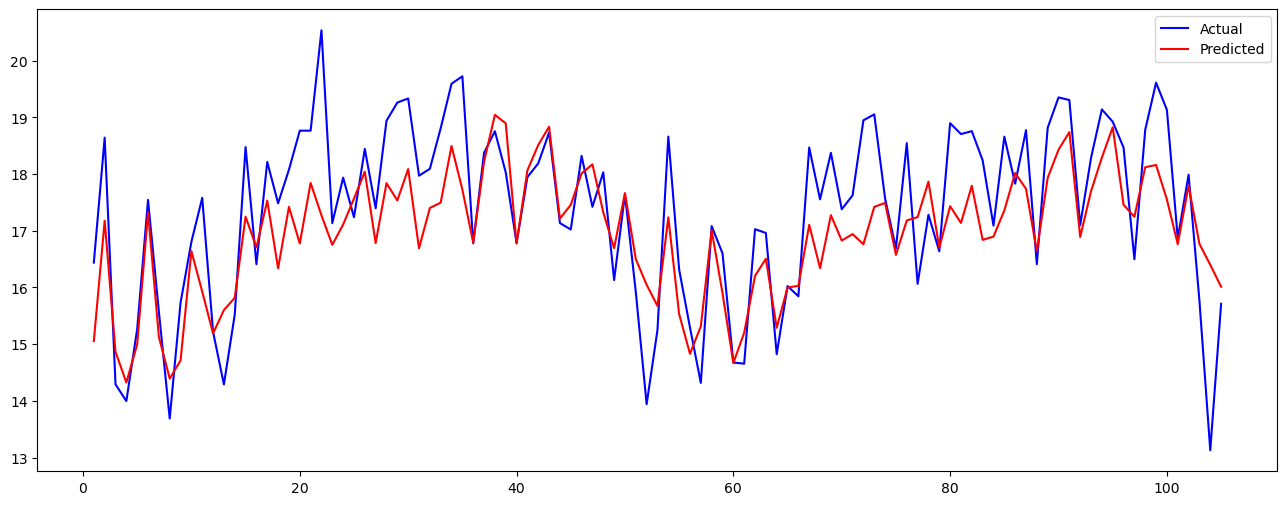

In [172]:
x_labels = range(1, 106)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values2, color='blue', label='Actual')
plt.plot(x_labels, predictions2, color='red', label='Predicted')
plt.legend()
plt.show()

3- Monthly Basis

In [125]:
train_data3

,Humidity
date,
2012-01-31,14.757500
2012-02-29,15.247037
2012-03-31,16.119677
2012-04-30,17.304667
2012-05-31,17.130000
...,...
2019-08-31,18.183226
2019-09-30,18.326667
2019-10-31,18.060000


In [126]:
test_data3

,Humidity
date,
2020-01-31,15.668710
2020-02-29,15.596071
2020-03-31,15.867742
2020-04-30,17.645000
2020-05-31,18.680968
2020-06-30,17.783667
2020-07-31,18.789032
2020-08-31,18.806129
2020-09-30,18.039333


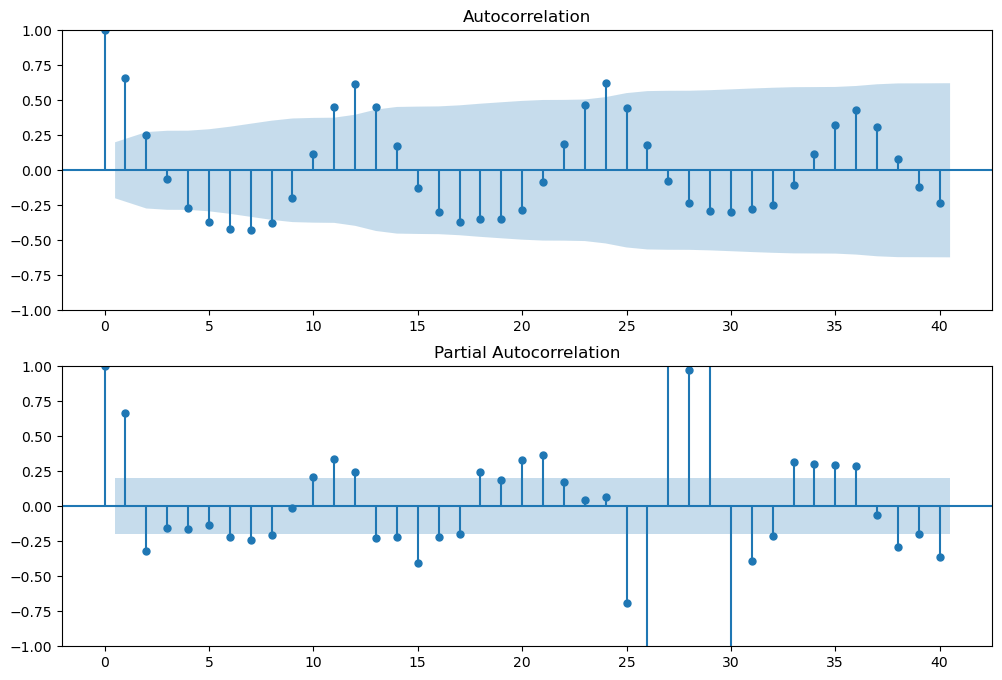

In [127]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
plot_acf(train_data3, lags=40, ax=ax[0])
plot_pacf(train_data3, lags=40, ax=ax[1])
plt.show()

In [128]:
model3 = ARIMA(train_data3['Humidity'], order=(12,1,4))
results3 = model3.fit()

Quater

In [173]:
predictions31 = results3.forecast(quater2)
np.array(predictions31).round(2)

array([15.83, 15.9 , 16.14, 17.03, 17.62, 17.55])

In [174]:
rmse31 = mean_squared_error(test_data3[:quater2], predictions31, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse31)

Root Mean Squared Error is : 0.540


In [175]:
loss31 = np.sqrt(np.mean(np.square(((test_data3[:quater2].Humidity.values - predictions31) / test_data3[:quater2].Humidity.values)), axis=0))
print(loss31*100)

2.99921584136832


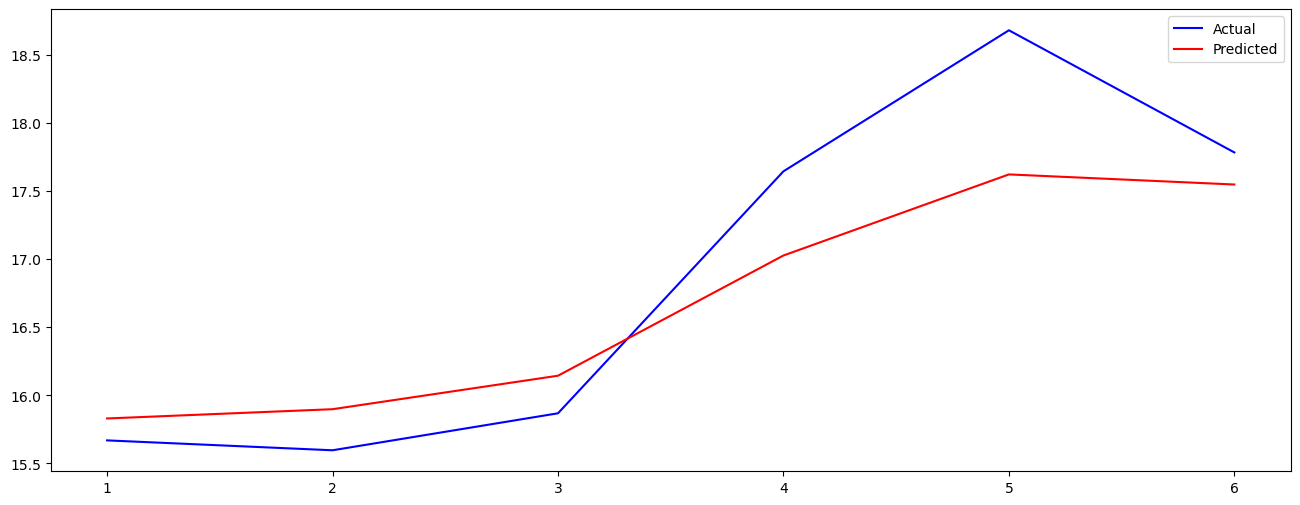

In [178]:
x_labels = range(1, 7)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values31, color='blue', label='Actual')
plt.plot(x_labels, predictions31, color='red', label='Predicted')
plt.legend()
plt.show()

Half

In [179]:
predictions32 = results3.forecast(half2)
np.array(predictions32).round(2)

array([15.83, 15.9 , 16.14, 17.03, 17.62, 17.55, 17.8 , 17.98, 18.22,
       18.02, 17.55, 16.56])

In [180]:
rmse32 = mean_squared_error(test_data3[:half2], predictions32, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse32)

Root Mean Squared Error is : 0.583


In [181]:
loss32 = np.sqrt(np.mean(np.square(((test_data3[:half2].Humidity.values - predictions32) / test_data3[:half2].Humidity.values)), axis=0))
print(loss32*100)

3.2505274648390814


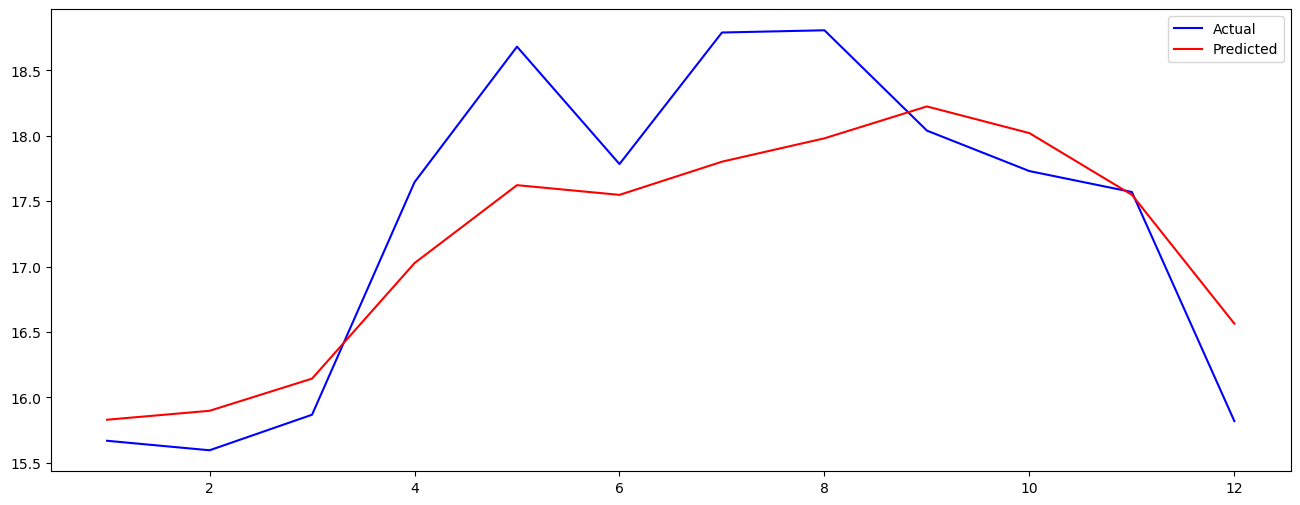

In [184]:
x_labels = range(1, 13)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values32, color='blue', label='Actual')
plt.plot(x_labels, predictions32, color='red', label='Predicted')
plt.legend()
plt.show()

Full

In [185]:
predictions3 = results3.forecast(len(test_data3))
np.array(predictions3).round(2)

array([15.83, 15.9 , 16.14, 17.03, 17.62, 17.55, 17.8 , 17.98, 18.22,
       18.02, 17.55, 16.56, 16.06, 15.9 , 16.33, 16.94, 17.43, 17.56,
       17.75, 17.9 , 18.1 , 17.95, 17.52, 16.74])

In [186]:
rmse3 = mean_squared_error(test_data3, predictions3, squared=False)
print("Root Mean Squared Error is : %.3f" %rmse3)

Root Mean Squared Error is : 0.582


In [187]:
loss3 = np.sqrt(np.mean(np.square(((test_data3.Humidity.values - predictions3) / test_data3.Humidity.values)), axis=0))
print(loss3*100)

3.2934119787215304


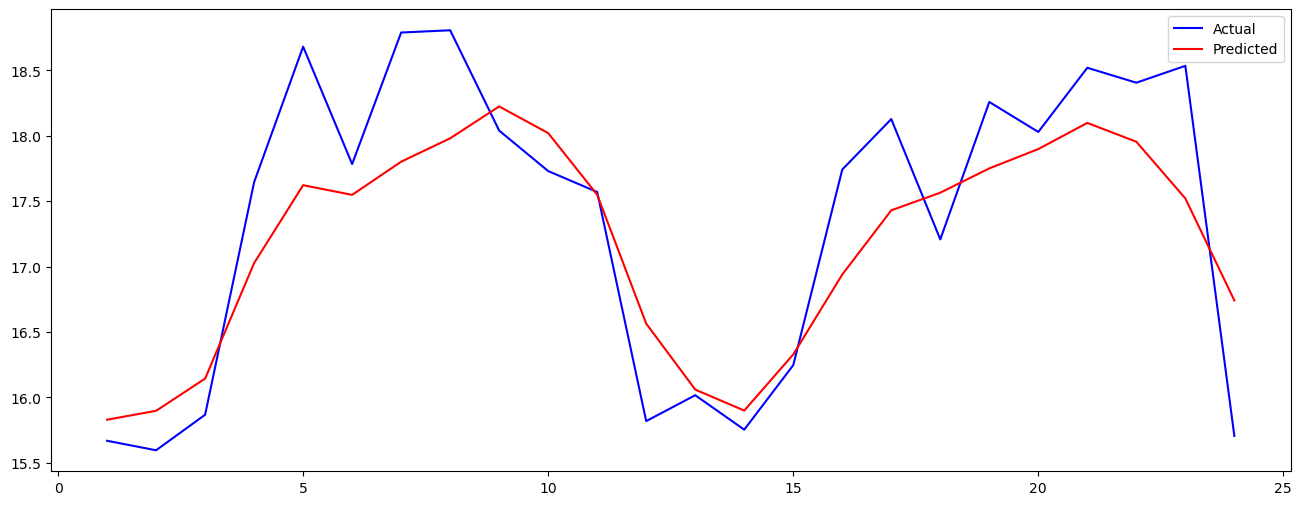

In [188]:
x_labels = range(1, 25)
plt.figure(figsize=(16,6))
plt.plot(x_labels, actual_values33, color='blue', label='Actual')
plt.plot(x_labels, predictions3, color='red', label='Predicted')
plt.legend()
plt.show()